# Imports

Import relevant packages

In [1]:
# Install and import MSprime
!apt-get install python-dev libgsl0-dev
!pip install -q msprime tskit tsinfer

import msprime 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgsl-dev' instead of 'libgsl0-dev'
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl23 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,926 kB of archives.
After this operation, 9,474 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgslcblas0 amd64 2.4+dfsg-6 [79.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl23 amd64 2.4+dfsg-6 [823 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe 

In [1]:
from google.colab import drive 
import numpy as np # For numerical methods and data manipulation
import keras # Neural networks
import matplotlib.pyplot as plt # For plots 
import tensorflow as tf

# Keras methods for creating neural networks
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# Sklearn methods for testing and validation 
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from scipy.special import comb

In [2]:
# Mount google drive to the session
drive.mount("/content/gdrive")
data_dir = "/content/gdrive/My Drive/infGeneticData/"

Mounted at /content/gdrive


# Data Generation

Methods to generate data 

In [19]:
# Function to determine if a 4x2 input holds the pattern of the 4GT
# Arguments:
# b_arr - 4x2 binary array
def check4GT4x2(b_arr):

  Values = 0
  row_vals = np.array([0,1,1,2])
  col_vals = np.array([2,2])
  
  if (np.array_equal(np.sort(b_arr.sum(axis = 1)),row_vals) and np.array_equal(b_arr.sum(axis = 0),col_vals)):
    Values = 1
    
  return Values


# Function to determine how many times the four gamete test has been violated in an input
# Uses the check4GT4x2 function to check the 4GT
# Arguments:
# b_arrs - a binary matrix of any size 
def countFourGT(b_arrs):
  
  count = 0

  for i in range(np.shape(b_arrs)[1]-1):
    for j in range(i+1,np.shape(b_arrs)[1]):
      for k in range(np.shape(b_arrs)[0]-3):
        for l in range(k+1,np.shape(b_arrs)[0]-2):
          for m in range(l+1,np.shape(b_arrs)[0]-1):
            for n in range(m+1,np.shape(b_arrs)[0]):
              colidx = np.array([i,j])
              rowidx = np.array([k,l,m,n])
              if check4GT4x2(b_arrs[rowidx[:,None],colidx]) == 1:
                count += 1
                
  return count

# Function to determine if the Four Gamete Test has been violated in a binary input matrix
def checkFourGT(b_arrs):
  
  for i in range(np.shape(b_arrs)[1]-1):
    for j in range(i+1,np.shape(b_arrs)[1]):
      for k in range(np.shape(b_arrs)[0]-3):
        for l in range(k+1,np.shape(b_arrs)[0]-2):
          for m in range(l+1,np.shape(b_arrs)[0]-1):
            for n in range(m+1,np.shape(b_arrs)[0]):
              colidx = np.array([i,j])
              rowidx = np.array([k,l,m,n])
              if check4GT4x2(b_arrs[rowidx[:,None],colidx]) == 1:
                return 1
                
  return 0

In [51]:
# Function to generate binary incidence matrix data 
#Arguments:
# N - number of positive and negative examples
# n - sample size
# k - number of segregating sites
# mr - mutation rate
# L - length of the sequence
# Ne - effective population size
# rr - recombination rate
def generateData(N,n,k,mr,L,Ne,rr=0):
  dataPositive = np.zeros((N,n,k))
  dataNegative = np.zeros((N,n,k))
  i = 0
  j = 0

  while np.min([i,j]) < N:
    tree_sequence = msprime.simulate(sample_size=n, Ne=Ne,length=L,mutation_rate=mr,recombination_rate=rr)
    if tree_sequence.get_num_mutations() = k:
      data = np.transpose(tree_sequence.genotype_matrix())

      GT = checkFourGT(data)

      if GT == 0:
        if i < N:
          dataNegative[i] = data
        i += 1

      elif GT == 1:
        if j < N:
          dataPositive[j] = data
        j += 1

  return [dataPositive, dataNegative]

In [53]:
positive20x20,negative20x20 = generateData(100,20,20,1e-6,1409,1000,1e-6)

In [58]:
np.save(data_dir + "FGTpos2020",positive20x20)
np.save(data_dir + "FGTneg2020",negative20x20)

# Data Import 

Import saved data so it does not have to be generated repeatedly

In [5]:
# Import sequence data 
# 2000 sets of 5x4 data of each positive and negative violations of the 4GT
neg54 = np.load(data_dir + "FGTneg54.npy")
pos54 = np.load(data_dir + "FGTpos54.npy")

# 2000 sets of 8x4 data of each positive and negative violations of the 4GT
neg84 = np.load(data_dir + "FGTneg84.npy")
pos84 = np.load(data_dir + "FGTpos84.npy")

# 2000 sets of 12x4 data of each positive and negative violations of the 4GT
neg124 = np.load(data_dir + "FGTneg124.npy")
pos124 = np.load(data_dir + "FGTpos124.npy")

# 2000 sets of 16x4 data of each positive and negative violations of the 4GT
neg164 = np.load(data_dir + "FGTneg164.npy")
pos164 = np.load(data_dir + "FGTpos164.npy")

# 100 sets of 20x20 data of each positive and negative violations of the 4GT
neg2020 = np.load(data_dir + "FGTneg2020.npy")
pos2020 = np.load(data_dir + "FGTpos2020.npy")

# Create the true labels for the data 
neg54y = np.full(2000,0,dtype="float64")
pos54y = np.full(2000,1,dtype="float64")
neg84y = np.full(2000,0,dtype="float64")
pos84y = np.full(2000,1,dtype="float64")
neg124y = np.full(2000,0,dtype="float64")
pos124y = np.full(2000,1,dtype="float64")
neg164y = np.full(2000,0,dtype="float64")
pos164y = np.full(2000,1,dtype="float64")
neg2020y = np.full(100,0,dtype="float64")
pos2020y = np.full(100,1,dtype="float64")

# Add a third dimension to the data so it can be used in convolutional layers
neg54 = np.reshape(neg54,(np.shape(neg54)[0],np.shape(neg54)[1],np.shape(neg54)[2],1))
pos54 = np.reshape(pos54,(np.shape(pos54)[0],np.shape(pos54)[1],np.shape(pos54)[2],1))
neg84 = np.reshape(neg84,(np.shape(neg84)[0],np.shape(neg84)[1],np.shape(neg84)[2],1))
pos84 = np.reshape(pos84,(np.shape(pos84)[0],np.shape(pos84)[1],np.shape(pos84)[2],1))
neg124 = np.reshape(neg124,(np.shape(neg124)[0],np.shape(neg124)[1],np.shape(neg124)[2],1))
pos124 = np.reshape(pos124,(np.shape(pos124)[0],np.shape(pos124)[1],np.shape(pos124)[2],1))
neg164 = np.reshape(neg164,(np.shape(neg164)[0],np.shape(neg164)[1],np.shape(neg164)[2],1))
pos164 = np.reshape(pos164,(np.shape(pos164)[0],np.shape(pos164)[1],np.shape(pos164)[2],1))
neg2020 = np.reshape(neg2020,(np.shape(neg2020)[0],np.shape(neg2020)[1],np.shape(neg2020)[2],1))
pos2020 = np.reshape(pos2020,(np.shape(pos2020)[0],np.shape(pos2020)[1],np.shape(pos2020)[2],1))

# Concatenate both positive and negative data into one data set
dat54 = np.concatenate((neg54,pos54),axis = 0)
dat84 = np.concatenate((neg84,pos84),axis = 0)
dat124 = np.concatenate((neg124,pos124),axis = 0)
dat164 = np.concatenate((neg164,pos164),axis = 0)
dat2020 = np.concatenate((neg2020,pos2020),axis = 0)

dat54y = np.concatenate((neg54y,pos54y),axis = 0)
dat84y = np.concatenate((neg84y,pos84y),axis = 0)
dat124y = np.concatenate((neg124y,pos124y),axis = 0)
dat164y = np.concatenate((neg164y,pos164y),axis = 0)
dat2020y = np.concatenate((neg2020y,pos2020y),axis = 0)

# Shuffle the data so it is in a random order 
X54,Y54 = shuffle(dat54,dat54y)
X84,Y84 = shuffle(dat84,dat84y)
X124,Y124 = shuffle(dat124,dat124y)
X164,Y164 = shuffle(dat164,dat164y)
X2020,Y2020 = shuffle(dat2020,dat2020y)

# Data Augmentation

Methods to permute a data-set by either column or row permutation

In [6]:
# Function to column permute a set of data
# Arguments
# x - data to permute
# m - integer number greater than 0. Number of times each data point should be permuted
def columnPermute(x,m):

  dim = len(np.shape(x))

  # If the data is 2d make it 3d 
  if dim == 2:
    x = np.reshape(x,(1,np.shape(x)[0],np.shape(x)[1]))
    dim = 3

  # number of data points  
  n = np.shape(x)[0]

  # Number of columns
  c = np.shape(x)[2]

  if dim == 3:
    xtildr = np.zeros((n*m,np.shape(x)[1],np.shape(x)[2]))

  if dim == 4:
    xtildr = np.zeros((n*m,np.shape(x)[1],np.shape(x)[2],np.shape(x)[3]))

  for i in range(n):
    for j in range(m):
      p = np.random.permutation(c)
      xtildr[m*i+j] = x[i][:,p]

  return xtildr

# Function to row permute a set of data
# Arguments
# x - data to permute
# m - integer number greater than 0. Number of times each data point should be permuted
def rowPermute(x,m):

  dim = len(np.shape(x))

  # If the data is 2d make it 3d 
  if dim == 2:
    x = np.reshape(x,(1,np.shape(x)[0],np.shape(x)[1]))

  # number of data points  
  n = np.shape(x)[0]

  # Number of rows
  r = np.shape(x)[1]

  if dim == 3:
    xtildr = np.zeros((n*m,np.shape(x)[1],np.shape(x)[2]))

  if dim == 4:
    xtildr = np.zeros((n*m,np.shape(x)[1],np.shape(x)[2],np.shape(x)[3]))

  for i in range(n):
    for j in range(m):
      p = np.random.permutation(r)
      xtildr[m*i+j] = x[i][p]

  return xtildr
  
# Function to column and row permute a set of data
# Arguments
# x - data to permute
# m - integer number greater than 0. Number of times each data point should be permuted
def Permute(x,m):
  # Generate a random 1 or 0
  u = np.random.randint(0,2)

  # if u is 1
  # Column permute then row permute
  if u == 1:
    xs = columnPermute(x,m)

    xs = rowPermute(xs,1)

  # if u is 0
  # Row permute then column permute 
  if u != 1:
    xs = rowPermute(x,m)

    xs = columnPermute(xs,1)

  return xs

In [7]:
# A function that takes in data x and labels y and column and row permutes the data 
def permuteData(x,y,m):
  ys = np.repeat(y,m)

  xs = Permute(x,m)

  return shuffle(xs,ys)

In [8]:
# A function to split a matrix of dimension 8x4 into vectors which are the rows of the matrix
# this is used for the invariant learnt architecture
def split84(x):
  n = np.shape(x)[0]
  x1 = np.zeros((n,1,4,1))
  x2 = np.zeros((n,1,4,1))
  x3 = np.zeros((n,1,4,1))
  x4 = np.zeros((n,1,4,1))
  x5 = np.zeros((n,1,4,1))
  x6 = np.zeros((n,1,4,1))
  x7 = np.zeros((n,1,4,1))
  x8 = np.zeros((n,1,4,1))

  for i in range(n):
    xs = np.split(x[i],8)
    x1[i] = xs[0]
    x2[i] = xs[1]
    x3[i] = xs[2]
    x4[i] = xs[3]
    x5[i] = xs[4]
    x6[i] = xs[5]
    x7[i] = xs[6]
    x8[i] = xs[7]

  return [x1,x2,x3,x4,x5,x6,x7,x8]


# Row Model

Handcrafted Neural network to detect the 4GT using kernels that act over the rows of the input



In [ ]:
# step function 
# Arguments: 
# x - input array of values to calculate the step function on
def step(x):
  return tf.cast(x > 0,tf.int8)

# Function to generate the kernel weights for the sequence architecture
def kWeights(k,kc):
  weights = np.zeros((k,4*kc))

  i = 0
  for l in range(k-1):
    for r in range(l+1,k):
      weights[l,4*i] = 1
      weights[r,4*i] = 1
      weights[l,4*i+1] = 1
      weights[r,4*i+1] = -1
      weights[l,4*i+2] = -1
      weights[r,4*i+2] = 1
      weights[l,4*i+3] = -1
      weights[r,4*i+3] = -1
      i += 1

  return weights

In [ ]:
# Function which defines a keras model to detect the 4GT
# with kernels applied over the rows 
# The function calculates all the necessary weights and biases
# Arguments:
# n - number of rows in the input 
# k - number of columns in the input 

def genRowModel(n,k):
  # Caclulate k choose 2
  kc2 = int(comb(k,2))

  # Define the structure of the model
  model = Sequential()
  model.add(Conv2D(4*kc2,(1,k),activation=step,input_shape = (n,k,1)))
  model.add(MaxPooling2D((n,1)))
  model.add(Flatten())
  model.add(Dense(kc2,activation=step))
  model.add(Dense(1,activation=step))

  # Calculate the weights for the model
  kernelWeights = np.reshape(kWeights(k,kc2),(1,k,1,4*kc2))
  kernelBias = np.tile(np.array([-1,0,0,1]),kc2)
  
  ANDWeights = np.repeat(np.identity(kc2),4,axis = 0)
  ANDBias = np.full(kc2,-3.5)

  ORWeights = np.reshape(np.full(kc2,1),(kc2,1))
  ORBias = np.array([-0.5])

  # Set the weights for the model
  model.set_weights([kernelWeights,kernelBias,ANDWeights,ANDBias,ORWeights,ORBias])

  return model


# Learning the sequence architecture 

This section explores how well the sequence architecture can be learnt, looking mainly at how using augmented data can help the training of the network.

In [ ]:
# Define the architecture with a 5x4 input 
sequence_model_learnt = Sequential()
sequence_model_learnt.add(Conv2D(24,(1,4),input_shape = (5,4,1),activation = "sigmoid"))
sequence_model_learnt.add(MaxPooling2D((5,1)))
sequence_model_learnt.add(Flatten())
sequence_model_learnt.add(Dense(6,activation= "sigmoid"))
sequence_model_learnt.add(Dense(1,activation="sigmoid"))

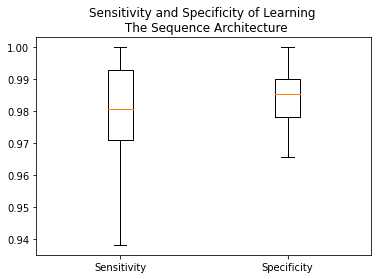

In [ ]:
# Fit the sequence architecture using 20-fold cross validation
kf = KFold(20)

# vector to store sensitivity and specificity
seqSensSpec = np.zeros((20,2))
j = 0

for train_index, test_index in kf.split(X54):

  X_train, X_test = X54[train_index], X54[test_index]
  y_train, y_test = Y54[train_index], Y54[test_index]

  # Fit the model on the training data
  sequence_model_learnt.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy",keras.metrics.TruePositives(),keras.metrics.FalsePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalseNegatives()])
  sequence_model_learnt.fit(X_train,y_train,batch_size=50,epochs=40,verbose = 0)

  # Evaluate on the test data and calulate the sensitivity and specificity
  a,b,TP,FP,TN,FN = sequence_model_learnt.evaluate(X_test,y_test,batch_size=200,verbose = 0)
  seqSensSpec[j,0] = TP/(TP + FN)
  seqSensSpec[j,1] = TN/(TN + FP)

  j += 1

# Plot the accuracy values 
plt.boxplot(seqSensSpec, labels = ("Sensitivity","Specificity"))
plt.title("Sensitivity and Specificity of Learning \n The Sequence Architecture")
plt.show()

In [ ]:
# Interrogate the ouputs of the max pooling layer to see many of them are zero

X_train, X_test, y_train, y_test = train_test_split(X54,Y54)

# train a model
sequence_model_learnt.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy",keras.metrics.TruePositives(),keras.metrics.FalsePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalseNegatives()])
sequence_model_learnt.fit(X_train,y_train,batch_size=50,epochs=40,verbose = 0)

# function to get outputs of the max pooling layer
intermediate_layer_model = keras.Model(inputs=sequence_model_learnt.input,
                                       outputs=sequence_model_learnt.get_layer(index = 1).output)
intermediate_output = intermediate_layer_model(X_test)

print("Average outputs of the max pooling layer")
print(np.mean(intermediate_output,axis = 0))
print("variance in outputs of the max pooling layer")
print(np.var(intermediate_output,axis = 0))

[[[1.4482655e-06 2.8863192e-01 4.5032117e-01 2.9791757e-01 1.2393692e-06
   4.6060271e-05 1.2599320e-06 4.6278228e-07 3.4099999e-01 3.5306361e-01
   1.1062768e-06 1.1118638e-06 4.7856122e-02 3.3569103e-07 3.3508340e-01
   9.0178708e-07 5.9292179e-01 6.6085035e-01 5.2300000e-01 3.2491082e-01
   1.0789898e-06 4.3174228e-01 5.2333367e-01 5.6235594e-01]]]
[[[1.2925059e-12 1.4885700e-01 1.5932487e-01 1.7709470e-01 1.7879057e-12
   3.5571128e-09 1.8442444e-12 1.0197015e-13 2.2472022e-01 2.0730901e-01
   1.4225156e-12 1.4348610e-12 2.6669425e-03 1.0447309e-13 2.1973208e-01
   9.4527706e-13 1.6141073e-01 2.2248188e-01 2.4946991e-01 1.1220324e-01
   1.3548228e-12 1.7709589e-01 2.4714118e-01 2.1812564e-01]]]


In [ ]:
# Generate the permuted data 
X54A,Y54A = permuteData(X54,Y54,1)

# Matrices to store specificities and sensitivities
output54 = np.zeros((20,2))
output54AugTest = np.zeros((20,2))
output54AugTrain = np.zeros((20,2))
output54AugTrainAugTest = np.zeros((20,2))

for j in range(20):
    # generate train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X54,Y54,train_size = 0.2)
    X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X54A,Y54A,train_size = 0.2) 

    # train a model on normal data
    sequence_model_learnt.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy",keras.metrics.TruePositives(),keras.metrics.FalsePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalseNegatives()])
    sequence_model_learnt.fit(X_train,Y_train,batch_size=50,epochs=40,verbose = 0)

    # test the model on normal data
    a,b,TP,FP,TN,FN = sequence_model_learnt.evaluate(X_test,Y_test,batch_size=200,verbose = 0)
    output54[j,0] = TP/(TP + FN)
    output54[j,1] = TN/(TN + FP)

    # test the model on permuted data
    a,b,TP,FP,TN,FN = sequence_model_learnt.evaluate(X_test_A,Y_test_A,batch_size=200,verbose = 0)
    output54AugTest[j,0] = TP/(TP + FN)
    output54AugTest[j,1] = TN/(TN + FP)

    # train a model on permuted data
    sequence_model_learnt.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy",keras.metrics.TruePositives(),keras.metrics.FalsePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalseNegatives()])
    sequence_model_learnt.fit(X_train_A,Y_train_A,batch_size=50,epochs=40,verbose = 0)

    # test the model on normal data
    a,b,TP,FP,TN,FN = sequence_model_learnt.evaluate(X_test,Y_test,batch_size=200,verbose = 0)
    output54AugTrain[j,0] = TP/(TP + FN)
    output54AugTrain[j,1] = TN/(TN + FP)

    # test the model on permuted data
    a,b,TP,FP,TN,FN = sequence_model_learnt.evaluate(X_test_A,Y_test_A,batch_size=200,verbose = 0)
    output54AugTrainAugTest[j,0] = TP/(TP + FN)
    output54AugTrainAugTest[j,1] = TN/(TN + FP)
  

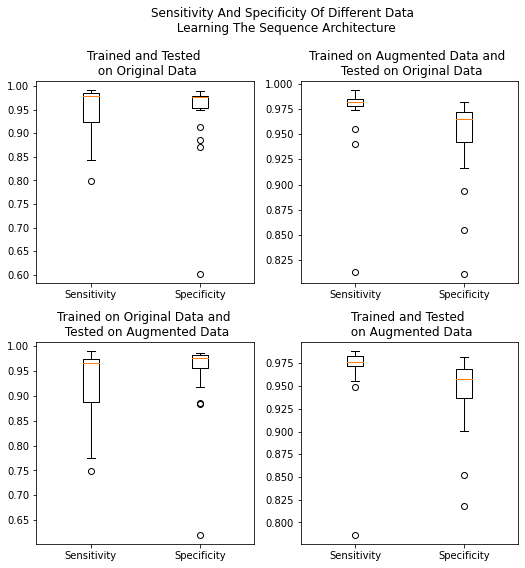

In [ ]:

fig, axs = plt.subplots(2,2,figsize = (8,8))
axs[0,0].boxplot(output54, labels = ("Sensitivity","Specificity"))
axs[0,0].set_title("Trained and Tested \n on Original Data")
axs[1,0].boxplot(output54AugTest, labels = ("Sensitivity","Specificity"))
axs[1,0].set_title("Trained on Original Data and \n Tested on Augmented Data")
axs[0,1].boxplot(output54AugTrain, labels = ("Sensitivity","Specificity"))
axs[0,1].set_title("Trained on Augmented Data and \n Tested on Original Data")
axs[1,1].boxplot(output54AugTrainAugTest, labels = ("Sensitivity","Specificity"))
axs[1,1].set_title("Trained and Tested \n on Augmented Data")
fig.tight_layout(rect=[0,0,0.925,0.925])
fig.suptitle("Sensitivity And Specificity Of Different Data \n Learning The Sequence Architecture")

plt.show()

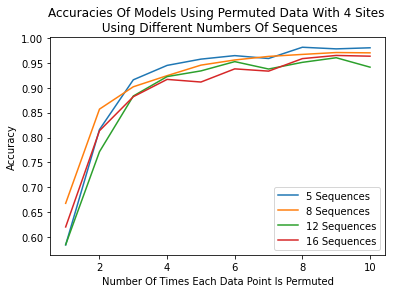

In [ ]:
# Compare models with different input sizes using different amounts of permuted data

sequence_model_learnt5 = Sequential()
sequence_model_learnt5.add(Conv2D(24,(1,4),input_shape = (5,4,1),activation = "sigmoid"))
sequence_model_learnt5.add(MaxPooling2D((5,1)))
sequence_model_learnt5.add(Flatten())
sequence_model_learnt5.add(Dense(6,activation= "sigmoid"))
sequence_model_learnt5.add(Dense(1,activation="sigmoid"))

sequence_model_learnt8 = Sequential()
sequence_model_learnt8.add(Conv2D(24,(1,4),input_shape = (8,4,1),activation = "sigmoid"))
sequence_model_learnt8.add(MaxPooling2D((8,1)))
sequence_model_learnt8.add(Flatten())
sequence_model_learnt8.add(Dense(6,activation= "sigmoid"))
sequence_model_learnt8.add(Dense(1,activation="sigmoid"))

sequence_model_learnt12 = Sequential()
sequence_model_learnt12.add(Conv2D(24,(1,4),input_shape = (12,4,1),activation = "sigmoid"))
sequence_model_learnt12.add(MaxPooling2D((12,1)))
sequence_model_learnt12.add(Flatten())
sequence_model_learnt12.add(Dense(6,activation= "sigmoid"))
sequence_model_learnt12.add(Dense(1,activation="sigmoid"))

sequence_model_learnt16 = Sequential()
sequence_model_learnt16.add(Conv2D(24,(1,4),input_shape = (16,4,1),activation = "sigmoid"))
sequence_model_learnt16.add(MaxPooling2D((16,1)))
sequence_model_learnt16.add(Flatten())
sequence_model_learnt16.add(Dense(6,activation= "sigmoid"))
sequence_model_learnt16.add(Dense(1,activation="sigmoid"))

m = [1,2,3,4,5,6,7,8,9,10]

accM5 = np.zeros((10,5))
accM8 = np.zeros((10,5))
accM12 = np.zeros((10,5))
accM16 = np.zeros((10,5))

for i in range(10):
  for j in range(5):
    X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X54,Y54,train_size = 0.2)
    X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X84,Y84,train_size = 0.2)
    X_train12, X_test12, Y_train12, Y_test12 = train_test_split(X124,Y124,train_size = 0.2)
    X_train16, X_test16, Y_train16, Y_test16 = train_test_split(X164,Y164,train_size = 0.2)

    sequence_model_learnt5.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy"])
    sequence_model_learnt5.fit(Permute(X_train5[0:50],m[i]),np.repeat(Y_train5[0:50],m[i]),batch_size=50,epochs=40,verbose = 0)

    accM5[i,j] = sequence_model_learnt5.evaluate(Permute(X_test5[0:50],m[i]),np.repeat(Y_test5[0:50],m[i]),batch_size=200,verbose = 0)[1]

    sequence_model_learnt8.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy"])
    sequence_model_learnt8.fit(Permute(X_train8[0:50],m[i]),np.repeat(Y_train8[0:50],m[i]),batch_size=50,epochs=40,verbose = 0)

    accM8[i,j] = sequence_model_learnt8.evaluate(Permute(X_test8,m[i]),np.repeat(Y_test8,m[i]),batch_size=200,verbose = 0)[1]

    sequence_model_learnt12.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy"])
    sequence_model_learnt12.fit(Permute(X_train12[0:50],m[i]),np.repeat(Y_train12[0:50],m[i]),batch_size=50,epochs=40,verbose = 0)

    accM12[i,j] = sequence_model_learnt12.evaluate(Permute(X_test12,m[i]),np.repeat(Y_test12,m[i]),batch_size=200,verbose = 0)[1]

    sequence_model_learnt16.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy"])
    sequence_model_learnt16.fit(Permute(X_train16[0:50],m[i]),np.repeat(Y_train16[0:50],m[i]),batch_size=50,epochs=40,verbose = 0)

    accM16[i,j] = sequence_model_learnt16.evaluate(Permute(X_test16,m[i]),np.repeat(Y_test16,m[i]),batch_size=200,verbose = 0)[1]

plt.plot(m,np.mean(accM5,axis=1),label = "5 Sequences")
plt.plot(m,np.mean(accM8,axis=1),label = "8 Sequences")
plt.plot(m,np.mean(accM12,axis=1),label = "12 Sequences")
plt.plot(m,np.mean(accM16,axis=1),label = "16 Sequences")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number Of Times Each Data Point Is Permuted")
plt.title("Accuracies Of Models Using Permuted Data With 4 Sites \n Using Different Numbers Of Sequences")
plt.show()

In [ ]:
# Compare the accuracy of models using different strengths of regularization

lmbda = np.linspace(0,0.001,50)

l1acc = np.zeros(50)
l2acc = np.zeros(50)
l1accp = np.zeros(50)
l2accp = np.zeros(50)
kf = KFold(50)

j = 0

for train_index, test_index in kf.split(X84):

  X_train, X_test = X84[train_index], X84[test_index]
  y_train, y_test = Y84[train_index], Y84[test_index]

  sequence_model_learnt_l1 = Sequential()
  sequence_model_learnt_l1.add(Conv2D(24,(1,4),input_shape = (8,4,1),activation = "sigmoid",kernel_regularizer=keras.regularizers.l1(lmbda[j])))
  sequence_model_learnt_l1.add(MaxPooling2D((8,1)))
  sequence_model_learnt_l1.add(Flatten())
  sequence_model_learnt_l1.add(Dense(6,activation= "sigmoid"))
  sequence_model_learnt_l1.add(Dense(1,activation="sigmoid"))

  sequence_model_learnt_l1.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy"])
  sequence_model_learnt_l1.fit(X_train,y_train,batch_size=50,epochs=40,verbose = 0)

  l1acc[j] = sequence_model_learnt_l1.evaluate(X_test,y_test,batch_size=200,verbose = 0)[1]
  l1accp[j] = sequence_model_learnt_l1.evaluate(Permute(X_test,1),y_test,batch_size=200,verbose = 0)[1]

  sequence_model_learnt_l2 = Sequential()
  sequence_model_learnt_l2.add(Conv2D(24,(1,4),input_shape = (8,4,1),activation = "sigmoid",kernel_regularizer=keras.regularizers.l2(lmbda[j])))
  sequence_model_learnt_l2.add(MaxPooling2D((8,1)))
  sequence_model_learnt_l2.add(Flatten())
  sequence_model_learnt_l2.add(Dense(6,activation= "sigmoid"))
  sequence_model_learnt_l2.add(Dense(1,activation="sigmoid"))

  sequence_model_learnt_l2.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy"])
  sequence_model_learnt_l2.fit(X_train,y_train,batch_size=50,epochs=40,verbose = 0)

  l2acc[j] = sequence_model_learnt_l2.evaluate(X_test,y_test,batch_size=200,verbose = 0)[1]
  l2accp[j] = sequence_model_learnt_l2.evaluate(Permute(X_test,1),y_test,batch_size=200,verbose = 0)[1]

  j += 1

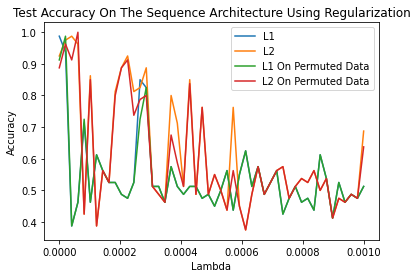

In [ ]:
plt.plot(lmbda,l1acc,label = "L1")
plt.plot(lmbda,l2acc,label = "L2")
plt.plot(lmbda,l1accp,label = "L1 On Permuted Data")
plt.plot(lmbda,l2accp,label = "L2 On Permuted Data")
plt.legend()
plt.title("Test Accuracy On The Sequence Architecture Using Regularization")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.show()

200/200 [==============================] - 1s 3ms/step - loss: 0.7126 - accuracy: 0.5013 - true_positives_14: 0.0000e+00 - false_positives_14: 0.0000e+00 - true_negatives_14: 3208.0000 - false_negatives_14: 3192.0000


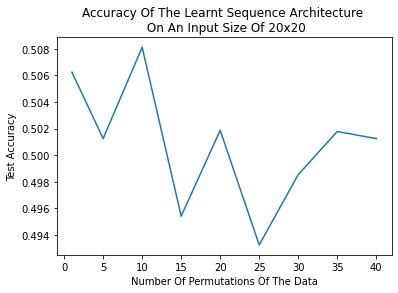

In [39]:
# Analyse the performance of the model on a larger data set

sequence_model_learnt20 = Sequential()
sequence_model_learnt20.add(Conv2D(760,(1,20),input_shape = (20,20,1),activation = "sigmoid"))
sequence_model_learnt20.add(MaxPooling2D((20,1)))
sequence_model_learnt20.add(Flatten())
sequence_model_learnt20.add(Dense(190,activation= "sigmoid"))
sequence_model_learnt20.add(Dense(1,activation="sigmoid"))

m = [1,5,10,15,20,25,30,35,40] 
acc = np.zeros(9)
for i in range(9):
  X2020p,Y2020p = permuteData(X2020,Y2020,m[i])

  X_train, X_test, Y_train, Y_test = train_test_split(X2020p,Y2020p,train_size = 0.2)

  sequence_model_learnt20.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(0.1),metrics=["accuracy",keras.metrics.TruePositives(),keras.metrics.FalsePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalseNegatives()])
  sequence_model_learnt20.fit(X_train,Y_train,batch_size=50,epochs=40,verbose = 0)
  acc[i] = sequence_model_learnt20.evaluate(X_test,Y_test)[1]

plt.plot(m,acc)
plt.title("Accuracy Of The Learnt Sequence Architecture \n On An Input Size Of 20x20")
plt.ylabel("Test Accuracy")
plt.xlabel("Number Of Permutations Of The Data")
plt.show()

# Row Invariant Model Structure



In [9]:
def rowInvModel(layer,m):
  shared_layer1 = Conv2D(m,(1,4),activation = "sigmoid")

  input1 = keras.Input(shape=(1,4,1))
  input2 = keras.Input(shape=(1,4,1))
  input3 = keras.Input(shape=(1,4,1))
  input4 = keras.Input(shape=(1,4,1))
  input5 = keras.Input(shape=(1,4,1))
  input6 = keras.Input(shape=(1,4,1))
  input7 = keras.Input(shape=(1,4,1))
  input8 = keras.Input(shape=(1,4,1))

  x1 = shared_layer1(input1)
  x1 = Flatten()(x1)

  x2 = shared_layer1(input2)
  x2 = Flatten()(x2)

  x3 = shared_layer1(input3)
  x3 = Flatten()(x3)

  x4 = shared_layer1(input4)
  x4 = Flatten()(x4)

  x5 = shared_layer1(input5)
  x5 = Flatten()(x5)

  x6 = shared_layer1(input6)
  x6 = Flatten()(x6)

  x7 = shared_layer1(input7)
  x7 = Flatten()(x7)

  x8 = shared_layer1(input8)
  x8 = Flatten()(x8)

  # 12,6,1
  mult = layer([x1,x2,x3,x4,x5,x6,x7,x8])
  #drp = keras.layers.Dropout(0.2)(mult)
  first = Dense(6,activation = "sigmoid")(mult)
  #second = Dense(6,activation="sigmoid")(first)
  out = Dense(1,activation = "sigmoid")(first)

  model = keras.Model(inputs = [input1,input2,input3,input4,input5,input6,input7,input8],outputs = out)

  return model

#modelMult = rowInvModel(keras.layers.Average())
#keras.utils.plot_model(modelMult,show_shapes=True)

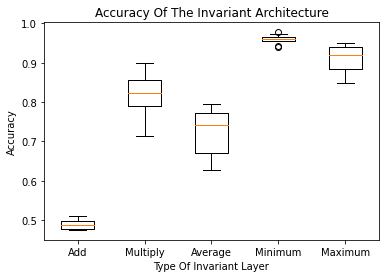

In [ ]:
kf = KFold(10)

layers = [keras.layers.Add(),keras.layers.Multiply(),keras.layers.Average(),keras.layers.Minimum(),keras.layers.Maximum()]
acc = np.zeros((5,10))
j = 0

for train_index, test_index in kf.split(X84):
  X_train, X_test = X84[train_index], X84[test_index]
  y_train, y_test = Y84[train_index], Y84[test_index]

  X_train_split = split84(X_train)
  X_test_split = split84(X_test)

  i = 0 
  for l in layers:
    model = rowInvModel(l,12)
    model.compile(optimizer=keras.optimizers.Adam(0.1),loss = "binary_crossentropy",metrics=["accuracy"])
    model.fit(x=X_train_split,y=y_train,batch_size= 50,epochs=30,verbose=0)
    acc[i,j] = model.evaluate(x=X_test_split,y=y_test,verbose=0)[1]
    i += 1
  
  j += 1

plt.boxplot(np.transpose(acc),labels=["Add","Multiply","Average","Minimum","Maximum"])
plt.title("Accuracy Of The Invariant Architecture")
plt.ylabel("Accuracy")
plt.xlabel("Type Of Invariant Layer")
plt.show()

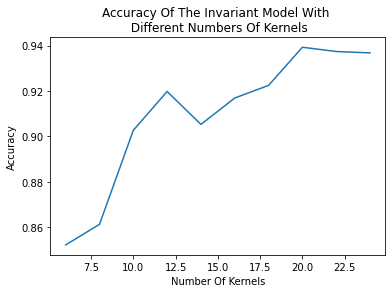

In [16]:
m = [6,8,10,12,14,16,18,20,22,24]
acc = np.zeros((10,5))

for i in range(10):
  for j in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X84,Y84,train_size = 0.2)
    X_train_split = split84(X_train)
    X_test_split = split84(X_test)

    model = rowInvModel(keras.layers.Minimum(),m[i])
    model.compile(optimizer=keras.optimizers.Adam(0.1),loss = "binary_crossentropy",metrics=["accuracy"])
    model.fit(x=X_train_split,y=Y_train,batch_size= 50,epochs=30,verbose=0)
    acc[i,j] = model.evaluate(x=X_test_split,y=Y_test,verbose=0)[1]
    

plt.plot(m,np.mean(acc,axis=1))
plt.title("Accuracy Of The Invariant Model With \n Different Numbers Of Kernels")
plt.xlabel("Number Of Kernels")
plt.ylabel("Accuracy")
plt.show()

# Classification On the Number Of Violations Of The Four Gamete Test

In [20]:
altDat84 = np.concatenate((neg84[0:200],pos84),axis = 0)
altDat84y = np.concatenate((neg84y[0:200],pos84y),axis = 0)
altX84,altY84 = shuffle(altDat84,altDat84y)
count84 = np.zeros(2200)
for i in range(2200):
  count84[i] = countFourGT(np.reshape(altX84[i],(8,4)))

print("The maximum numer of violations is:" + str(max(count84)))
# Create one hot encodings of the count of the number of violations of the 4GT
lb = LabelBinarizer()
lb.fit(list(range(0,52)))
Y84OH = lb.transform(count84)

The maximum numer of violations is:52.0


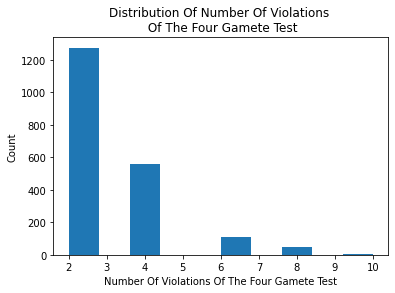

In [22]:
count54 = np.zeros(2000)
for i in range(2000):
  count54[i] = countFourGT(np.reshape(pos54[i],(5,4)))

plt.hist(count54)
plt.title("Distribution Of Number Of Violations \n Of The Four Gamete Test")
plt.xlabel("Number Of Violations Of The Four Gamete Test")
plt.ylabel("Count")
plt.show()

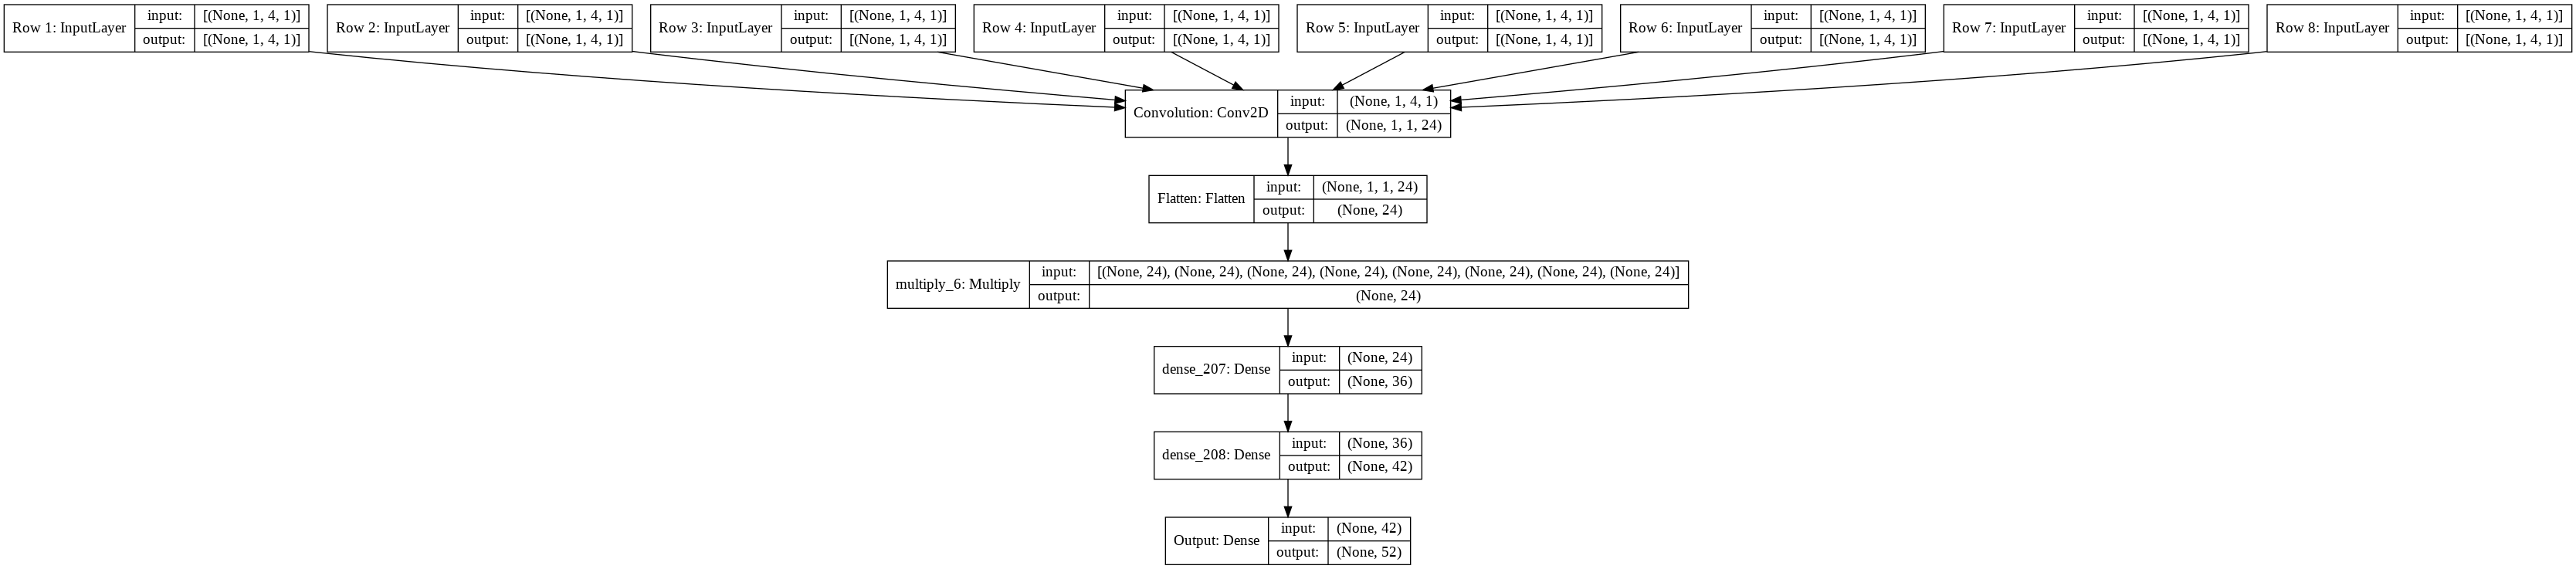

In [32]:
shared_layer1 = Conv2D(24,(1,4),activation = "relu",name = "Convolution")
fl = Flatten(name = "Flatten")

input1 = keras.Input(shape=(1,4,1),name = "Row 1")
input2 = keras.Input(shape=(1,4,1),name = "Row 2")
input3 = keras.Input(shape=(1,4,1),name = "Row 3")
input4 = keras.Input(shape=(1,4,1),name = "Row 4")
input5 = keras.Input(shape=(1,4,1),name = "Row 5")
input6 = keras.Input(shape=(1,4,1),name = "Row 6")
input7 = keras.Input(shape=(1,4,1),name = "Row 7")
input8 = keras.Input(shape=(1,4,1),name = "Row 8")

x1 = shared_layer1(input1)
x1 = fl(x1)

x2 = shared_layer1(input2)
x2 = fl(x2)

x3 = shared_layer1(input3)
x3 = fl(x3)

x4 = shared_layer1(input4)
x4 = fl(x4)

x5 = shared_layer1(input5)
x5 = fl(x5)

x6 = shared_layer1(input6)
x6 = fl(x6)

x7 = shared_layer1(input7)
x7 = fl(x7)

x8 = shared_layer1(input8)
x8 = fl(x8)

mult = keras.layers.Multiply()([x1,x2,x3,x4,x5,x6,x7,x8])

first1 = Dense(36,activation = "relu")(mult)
second1 = Dense(42,activation="relu")(first1)
out1 = Dense(52,activation = "softmax",name = "Output")(second1)

modelMC1 = keras.Model(inputs = [input1,input2,input3,input4,input5,input6,input7,input8],outputs = out1)
keras.utils.plot_model(modelMC1,show_shapes=True)

In [26]:
modelMC1.compile(optimizer=keras.optimizers.Adam(0.1),loss = "categorical_crossentropy",metrics=["accuracy"])
modelMC1.fit(x=split84(altX84),y = Y84OH,batch_size= 50,epochs=30)
print(modelMC1.evaluate(x=split84(altX84),y = Y84OH)[1])

Epoch 1/30
44/44 [==============================] - 1s 2ms/step - loss: 2.9758 - accuracy: 0.1653
Epoch 2/30
44/44 [==============================] - 0s 3ms/step - loss: 2.6418 - accuracy: 0.1739
Epoch 3/30
44/44 [==============================] - 0s 2ms/step - loss: 2.5775 - accuracy: 0.1990
Epoch 4/30
44/44 [==============================] - 0s 2ms/step - loss: 2.6108 - accuracy: 0.1931
Epoch 5/30
44/44 [==============================] - 0s 2ms/step - loss: 2.6245 - accuracy: 0.1716
Epoch 6/30
44/44 [==============================] - 0s 2ms/step - loss: 2.6026 - accuracy: 0.1853
Epoch 7/30
44/44 [==============================] - 0s 2ms/step - loss: 2.5693 - accuracy: 0.2090
Epoch 8/30
44/44 [==============================] - 0s 2ms/step - loss: 2.5719 - accuracy: 0.2103
Epoch 9/30
44/44 [==============================] - 0s 2ms/step - loss: 2.6082 - accuracy: 0.2062
Epoch 10/30
44/44 [==============================] - 0s 2ms/step - loss: 2.5805 - accuracy: 0.2001
Epoch 11/30
44/44 [